# Assignment 5 - Group 1

## Kaggle Submission ID:

## Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import datetime

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#Classifiers
from sklearn.ensemble import RandomForestClassifier

## Import & explore data

In [63]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [65]:
data['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [66]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [67]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [69]:
# Split training data & extract labels

train_set, test_set = train_test_split(data, test_size=0.2, random_state = 42)
y_train = train_set['label']
X_train = train_set.drop('label', axis=1)
y_test = test_set['label']
X_test = test_set.drop('label', axis=1)

In [70]:
#Shape of the data
X_train.shape

(33600, 784)

In [71]:
X_test.shape

(8400, 784)

## 1. Fitting a Random Forest Classifier

In [72]:
rnd_clf = RandomForestClassifier()
start = datetime.datetime.now()
rnd_clf.fit(X_train,y_train)
end = datetime.datetime.now()
print(f'Random classifier took {end - start} seconds to run on raw data')

Random classifier took 0:00:23.045313 seconds to run on raw data


In [73]:
y_pred = rnd_clf.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred)

0.9633333333333334

# Kaggle Score is:

## 2. Perform PCA on the combined training and test set data together

In [75]:
# Combine the data set

full_data = X_test.append(X_train).append(test_data)

In [76]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 5457 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 419.2 MB


In [77]:
# Generating principal components that represent 95 percent of the variability in the explanatory variables
start = datetime.datetime.now()
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(full_data)
end = datetime.datetime.now()
print(f'It took {end - start} seconds to identify the PCA')

It took 0:00:05.994341 seconds to identify the PCA


In [78]:
X_reduced

array([[-436.4309755 , -259.5779328 ,  198.38827636, ...,   49.36565913,
         -12.56603673,   57.27269646],
       [-942.43851218, -400.01792167,   10.34166076, ...,  -49.61726703,
          74.44900231,    8.75278918],
       [-525.66257263,  617.26294383,  -86.15405218, ...,  -32.35437731,
         -21.66636008,  -34.7747831 ],
       ...,
       [-138.40587705, -644.81877827, -880.68880607, ...,   38.03280932,
           7.46148739,   33.7243298 ],
       [ -49.43276834,  578.10899532, -323.9904944 , ...,    1.21587393,
          37.84560288,   12.56067207],
       [ 597.31312568,  141.72661007,  818.14854751, ...,   77.30176102,
          48.1828624 ,   69.49837151]])

In [79]:
print('The Principal components count is: ', pca.n_components_)

The Principal components count is:  154


In [80]:
X_reduced.shape

(70000, 154)

In [81]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467594,
       0.00454369, 0.00444918, 0.00418217, 0.00396164, 0.00383708,
       0.00375785, 0.00361426, 0.00349025, 0.00338732, 0.00319696,
       0.00316854, 0.00310145, 0.0029648 , 0.00287101, 0.00282514,
       0.00269423, 0.00268392, 0.00256509, 0.00253168, 0.00244648,
       0.00239702, 0.00238581, 0.00229234, 0.00220949, 0.0021306 ,
       0.00206317, 0.00202781, 0.00195035, 0.00191471, 0.0018855 ,
       0.00186976, 0.00180104, 0.00176787, 0.00173359, 0.00164

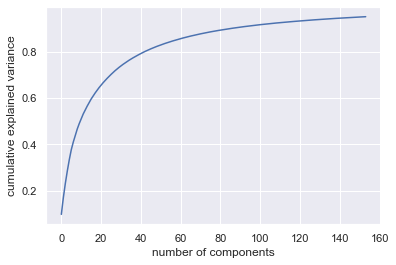

In [82]:
#Explained variance plot

cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## 3. Using the identified PC from above, use the train.csv to build another random forest classifier.

In [83]:
X_reduced_train = X_reduced[0:33600, :]
X_reduced_test = X_reduced[33600:42000, :]

In [84]:
# Convert to integers
X_reduced_train = X_reduced_train.astype(int)
X_reduced_test = X_reduced_test.astype(int)

In [85]:
## Here we have used train.csv data to build another random forest classifier and record the time along with accuracy.

start = datetime.datetime.now()
rnd_clf2 = RandomForestClassifier(n_estimators = 154, random_state = 42)
rnd_clf2.fit(X_reduced_train, y_train)
end = datetime.datetime.now()
print(f'Random classifier took {end - start} seconds to run on Test data using PCA')

Random classifier took 0:01:24.166400 seconds to run on Test data using PCA


In [86]:
y_pred2 = rnd_clf2.predict(X_reduced_test)

In [87]:
print('Accuracy: ', accuracy_score(y_test,y_pred2))

Accuracy:  0.1075


In [88]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
print('F1 accuracy: ', f1_score(y_pred2, y_test, average='macro'))

F1 accuracy:  0.10282705843258588


## 4. Submit both RF & PCA RF to Kaggle

## 5. Identify design flaw  re-run experiment

## 6.  k-means clustering to group MNIST observations into 1 of 10 categories & assign labels

In [217]:
#Manual method
from sklearn.cluster import KMeans

k = 92
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

In [218]:
X_representative_digits = X_train.iloc[representative_digit_idx]

In [219]:
representative_digit_idx

array([26482,  8657, 28473,  8267, 11312, 13442,   276,  5131, 15926,
       32239, 31289,  9124,  5908, 25443,  6046,  5853,  1335, 21650,
       18139, 12335, 18381,  5383, 16378, 11586, 13265, 14372, 24628,
       18289, 31131, 18523, 24416, 27974, 21082, 27757, 20738,  9686,
       13028, 11011, 15255, 25551,  1648,   253, 11911, 31468, 32090,
       14147, 11087, 18756,   117, 30610, 28210, 25329, 29554, 27528,
       12541, 20638, 11038, 18942, 23163,  9560,  1739, 31061, 11144,
       10502,  8192, 17456, 10064, 30526, 23626, 28803,  5798, 23814,
        5537,  3519, 12088, 28429, 11747, 19689, 19568, 32956,  1365,
       22154, 23295, 19833, 12132, 27166, 25323, 20232, 11736,  5150,
       19160, 13809], dtype=int64)

In [220]:
def convertImage(dfrow):
    image = np.array(X_train.iloc[dfrow], dtype='float').reshape((28,28))
    return image

In [226]:
representative_digit_idx

array([26482,  8657, 28473,  8267, 11312, 13442,   276,  5131, 15926,
       32239, 31289,  9124,  5908, 25443,  6046,  5853,  1335, 21650,
       18139, 12335, 18381,  5383, 16378, 11586, 13265, 14372, 24628,
       18289, 31131, 18523, 24416, 27974, 21082, 27757, 20738,  9686,
       13028, 11011, 15255, 25551,  1648,   253, 11911, 31468, 32090,
       14147, 11087, 18756,   117, 30610, 28210, 25329, 29554, 27528,
       12541, 20638, 11038, 18942, 23163,  9560,  1739, 31061, 11144,
       10502,  8192, 17456, 10064, 30526, 23626, 28803,  5798, 23814,
        5537,  3519, 12088, 28429, 11747, 19689, 19568, 32956,  1365,
       22154, 23295, 19833, 12132, 27166, 25323, 20232, 11736,  5150,
       19160, 13809], dtype=int64)

In [221]:
images = []
for digit in representative_digit_idx:
    image = convertImage(digit)
    images.append(image)
len(images)

92

In [229]:
while i < 4:
    print(i)
    i = i + 1

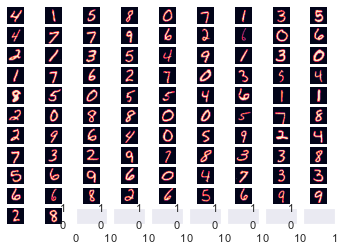

<Figure size 1440x1440 with 0 Axes>

In [238]:
fig, ax = plt.subplots(11,9)
plt.figure(figsize=(20,20))
i=0
j=0
counter = 0
while(j < 11):
    if counter == len(images)-1:
        break
    while(i < 9):
        ax[j,i].imshow(images[counter])
        ax[j,i].axis('off')
        if counter == len(images)-1:
            break
        counter = counter + 1
        i=i+1
    if i == 9:
        j=j+1
        i=0
fig.savefig('numbers.png') 

In [160]:
#Input numbers shown above into this array
y_representative_digits = np.array([2,1,5,5,4,5,0,6,0,2,9,6,3,9,4,9,5,8,6,8,1,7,3,0,7,2,6,3,9,3,7,0,5,7,8,0,6,1,7,9,3,2,4,7,0,4,8,1,6,4])

In [161]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ ==i] = y_representative_digits[i]

In [162]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.7984523809523809

Going to try and propagate the labels to the 20% of the instances that are closest to the centroids to see if we can improve our score

In [163]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [164]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.7446428571428572

Well that didn't help. Lets try GridSearchCV. Note only run this once. It takes 2+ hours to run.

In [165]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=92)),
    ('log_reg', LogisticRegression()),
])
pipeline.fit(X_train, y_train)

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

........... kmeans__n_clusters=53, total=  51.0s
[CV] kmeans__n_clusters=53 ...........................................
[CV] ............................ kmeans__n_clusters=53, total=  48.3s
[CV] kmeans__n_clusters=53 ...........................................
[CV] ............................ kmeans__n_clusters=53, total=  47.5s
[CV] kmeans__n_clusters=54 ...........................................
[CV] ............................ kmeans__n_clusters=54, total=  52.5s
[CV] kmeans__n_clusters=54 ...........................................
[CV] ............................ kmeans__n_clusters=54, total=  50.1s
[CV] kmeans__n_clusters=54 ...........................................
[CV] ............................ kmeans__n_clusters=54, total=  50.6s
[CV] kmeans__n_clusters=55 ...........................................
[CV] ............................ kmeans__n_clusters=55, total=  52.5s
[CV] kmeans__n_clusters=55 ...........................................
[CV] .......................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=92)),
    ('log_reg', LogisticRegression()),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=92)),
                ('log_reg', LogisticRegression())])

In [169]:
pipeline.score(X_test, y_test)

0.8679761904761905

In [167]:
grid_clf.best_params_

{'kmeans__n_clusters': 92}

In [170]:
grid_clf.score(X_test, y_test)

0.866547619047619